In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy import signal

In [2]:
#variance of the order parameter vs correlations? for suceptibility
@njit
def Kuram(T, dt, K,nunits):
    sigma = 0.98
    W = np.ones((nunits,nunits))
    omega = np.random.randn(nunits)*0.5 + 0.5
    W = W - np.eye(nunits)
    N = int(T/dt)
    thetas = np.random.random((N,nunits))*2*np.pi
    for r in range(N-1):
        for s in range(nunits):
            value = 0
            for j in range(nunits):
                value +=  K/nunits*W[s,j]*(np.sin(thetas[r,j] - thetas[r,s]))
            thetas[r + 1,s] = (thetas[r,s] + omega[s]*dt + value*dt + sigma*np.random.normal()*np.sqrt(dt))%(2*np.pi)
    return thetas

In [3]:
# Victor model
@njit
def ExcitableOscilla(T, dt, K,nunits, a = 1, sigma = 0.55):
    #a = 1
    #sigma = 0.55 #synchronous phase
    W = np.ones((nunits,nunits))
    omega = np.ones(nunits)
    W = W - np.eye(nunits)
    N = int(T/dt)
    thetas = np.random.random((N,nunits))*2*np.pi
    for r in range(N-1):
        for s in range(nunits):
            value = 0
            for j in range(nunits):
                value +=  K/nunits*W[s,j]*(np.sin(thetas[r,j] - thetas[r,s]))
            thetas[r + 1,s] = (thetas[r,s] + omega[s]*dt + value*dt + sigma*np.random.normal()*np.sqrt(dt) + a*np.sin(thetas[r,s])*dt)%(2*np.pi)
    return thetas

In [4]:
@njit
#?
def Kuram2(T, dt, K,nunits):
    W = np.ones((nunits,nunits))
    omega = np.random.randn(nunits)*0.5 + 0.5
    W = W - np.eye(nunits)
    N = int(T/dt)
    thetas = np.random.random((N,nunits))*2*np.pi
    for r in range(N-1):
        thetas[r + 1] = (thetas[r] + omega*dt + K/nunits*np.sum(W*np.sin(thetas[r] - thetas[r].reshape(-1,1)),1)*dt)%(2*np.pi)
    return thetas

In [5]:
def KuramotoIndex(sample, nunits = "default"):
    """
    sample.shape = time x space
    """
    if nunits == "default":
        nunits = sample.shape[1]
    sig = signal.hilbert(sample, axis = 0)
    phases = np.angle(sig)
    summ = np.mean(np.exp(1j*phases),1)
    sincr = np.abs(summ)
    return np.mean(sincr),sincr

In [6]:
@njit
def meanphasecoherence(phases, nunits):
    ##occhio quando non passo variabili alle funzioni!
    """
    phases is a 2dim matrix
    """
    mpc = np.zeros((nunits, nunits))
    for r in range(nunits):
        for s in range(nunits):
            mpc[r,s] = np.abs(np.mean(np.exp(1j*phases[:,r]-1j*phases[:,s])))
    return mpc

@njit
def entropy(N,p):
    return N*np.log(N/(N-p))-p*np.log(p/(N-p))

@njit
def returnsurrogatessecondtype(time, nunits):
    fase = 2*np.pi*np.random.uniform(0,1,(time,nunits))
    return fase

In [7]:
cd "../Criticality-in-barrel-cortex/"

/home/benny/Desktop/Github/Criticality-in-barrel-cortex


In [8]:
from valanghe import *

In [9]:
def returnentropy(time, nunits, thetas):
    nc = nunits
    N = nc*(nc-1)/2
    mpc = meanphasecoherence(thetas[5000:5000 + time],nunits)
    surr = returnsurrogatessecondtype(len(thetas[5000:5000 + time]), len(thetas[0]))
    mpcsurr = meanphasecoherence(surr, nunits)
    soglia = np.mean(mpcsurr.flatten())
    mpcbin = np.zeros((nunits,nunits))
    mpcbin[mpc> soglia] = 1
    pda = (np.sum(mpcbin)-nunits)/2
    if (N - pda) > 0:
        S = entropy(N,pda)
        return S,pda
    else: return 0,N

In [ ]:
N

In [22]:
p = np.arange(1,nc*(nc-1)/2 )
N = nc*(nc-1)/2
S = entropy(N,p)
Sdata = entropy(N,pda)
plt.plot(pda,Sdata, 'ro')
plt.plot(p,S)

NameError: name 'nc' is not defined

In [10]:
# Victor model
nunits = 300
#K = np.arange(0.1,3,0.15)
order = []
entropies = []
couples = []
corr = []
K = 1
thetas = ExcitableOscilla(80,0.001,K,nunits,1.024, 0.3)
activity = 1 + np.sin(thetas)
#print(activity.shape))
sincr = np.abs(np.mean(np.exp(1j*thetas),1))
order.append(np.mean(sincr))
"""
s = returnentropy(10000, nunits, thetas)
entropies.append(s[0])
couples.append(s[1])
"""

'\ns = returnentropy(10000, nunits, thetas)\nentropies.append(s[0])\ncouples.append(s[1])\n'

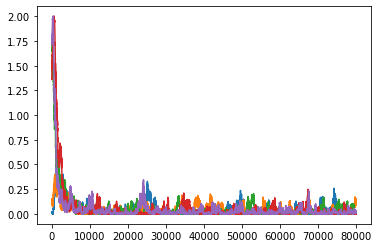

In [11]:
# Synchronous phase
plt.plot(activity[:,0])
plt.plot(activity[:,1])
plt.plot(activity[:,10])
plt.plot(activity[:,100])
plt.plot(activity[:,299])
#plt.xlim(5000,)

In [83]:
# Annealed Kuramoto Model
nunits = 300
#K = np.arange(0.1,3,0.15)
K = [1]
order = []
entropies = []
couples = []
corr = []
for l in K:
    thetas = Kuram(80,0.001,l,nunits)
    activity = 1 + np.sin(thetas)
    #print(activity.shape)
    #cc = np.corrcoef(activity[:]-np.mean(activity,1).reshape(-1,1), rowvar = False)
    #corr.append(np.mean(cc))
    #sincr = np.abs(np.mean(np.exp(1j*thetas),1))
    #order.append(np.mean(sincr))
    """
    s = returnentropy(10000, nunits, thetas)
    entropies.append(s[0])
    couples.append(s[1])
    """

In [31]:
binn = threshold(activity[:],np.ones(activity.shape[1])*0.05,np.ones(activity.shape[1])*0.1,1,"posneg", "option1")
#0.5, 1.1

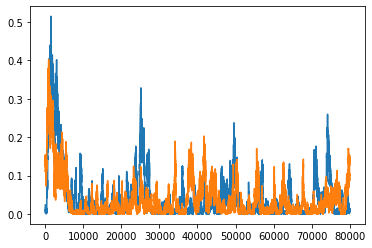

In [22]:
# Critical point Kuramoto
plt.plot(activity[:,0])
plt.plot(activity[:,1])
#plt.plot(activity[:,10])
#plt.plot(activity[:,100])
#plt.plot(activity[:,299])
#plt.xlim(5000,)

In [67]:
np.mean(np.array([[1,1,1],[3,1,2],[7,6,1]])) == np.mean(np.array([[1,1,1],[3,1,2],[7,6,1]]).flatten())

True

In [28]:
isi = []
for l in range(activity.shape[1]):
    isi += intertempi(binn[:,l]).tolist()


In [29]:
intertempi(events(binn)).mean(), intertempi(events(binn))[intertempi(events(binn))<2000].mean()

(61.680030840400924, 61.680030840400924)

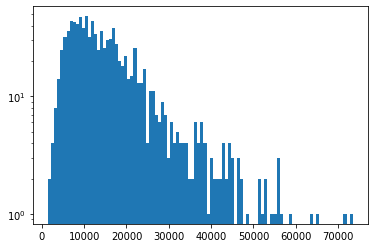

In [30]:
plt.hist(isi, bins = 100);
plt.yscale('log')

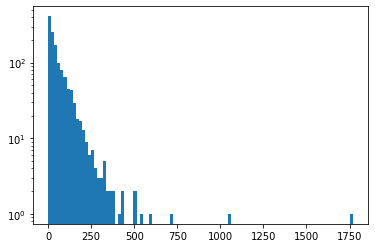

In [31]:
plt.hist(intertempi(events(binn)), bins = 100);
plt.yscale('log')

In [32]:
s,d = main(binn)

Calculating best minimal value for power law fit
C:\Users\Benedetta\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\Benedetta\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit


Prediction from crackling noise relation: delta =  1.3014455871863866 +- 0.16396673183702895
Fit from of average size given duration points: delta =  1.3302507274189141 +- 0.062395789217029894


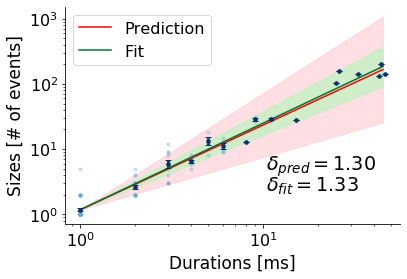

In [72]:
scaling(s,d,1)

In [13]:
def returnbin(n,interv):
    v = []
    
    if len(n)%interv > 0:
        add = (int(len(n)/interv) + 1)* interv - len(n)
        n = n.tolist()
        for i in range(add):
            n = n + [0]

    n = np.asarray(n).reshape(int(len(n)/interv), interv)
    
    for z in range(len(n)):
        if np.any(n[z]):
            v.append(1)
        else:
           
            v.append(0)
    return v
def RasterPlotnew(sample, xtime, av, ax = None, av_color = 'red',
               nsize = 1.5, alpha = 0.3):
    
    """
    Parameters
    --------
    sample : Array of discretized data. Dimensions : temporal dim x spatial dim1 (x spatial dim2)
    av : width of temporal bin 
    
    Returns
    --------
    Plots the Raster Plots and the detected avalanches (an avalanche is preceded and followed by white bins)
    
    """
    
    if ax == None:
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
    
    s = returnbin(events(sample),av)
    if s[0] == 1:
        start_av = True
    else:
        start_av = False

    s = xtime[(np.where(np.diff(s) != 0)[0]+1)*av]
    
    if start_av:
        s = np.concatenate([[0], s])
        
    if s.size % 2 != 0:
        s = s[:-1]
 
    for sval in s.reshape(-1, 2):
        ax.axvspan(sval[0], sval[1], 0.01, 0.99, color = av_color, alpha = alpha, zorder = -10)
    
    for j in range(sample.shape[1]):
        idx = np.where(sample[:,j]> 0)[0]
        ax.plot(xtime[idx], [j for i in range(len(idx))], '|', color = 'black', markersize = nsize)

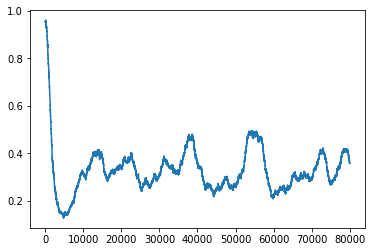

In [17]:
plt.plot(np.mean(activity,1))

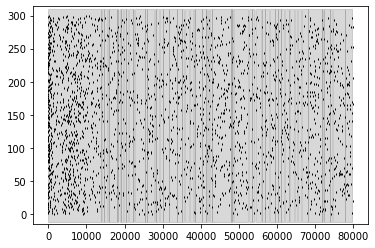

In [33]:
# Synchronous regime
RasterPlotnew(binn[:, :],np.arange(0,len(binn),1),100, ax = None, av_color ='gray')

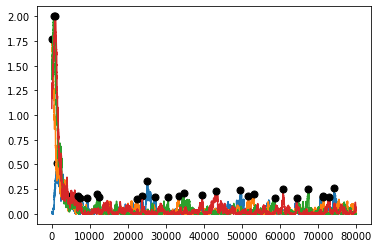

In [32]:
# synchronous regime

plt.plot(activity[:,0])
plt.plot(np.arange(0,len(activity))[binn[:,0]>0],activity[:,0][binn[:,0]>0], 'ko', ms = 7)
#plt.plot(np.arange(0,80000),np.ones(80000)*1,'r-', lw = 5)


plt.plot(activity[:,10])
plt.plot(np.arange(0,len(activity))[binn[:,10]>0],activity[:,10][binn[:,10]>0], 'ko', ms = 7)


plt.plot(activity[:,100])
plt.plot(np.arange(0,len(activity))[binn[:,100]>0],activity[:,100][binn[:,100]>0], 'ko', ms = 7)


plt.plot(activity[:,199])
plt.plot(np.arange(0,len(activity))[binn[:,199]>0],activity[:,199][binn[:,199]>0], 'ko', ms = 7)
#plt.xlim(0,10000)

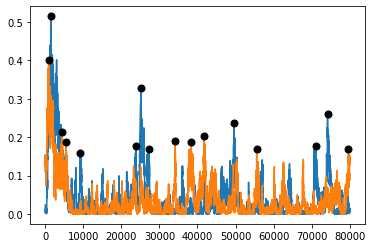

In [35]:
# synchronous regime

plt.plot(activity[:,0])
plt.plot(np.arange(0,len(activity))[binn[:,0]>0],activity[:,0][binn[:,0]>0], 'ko', ms = 7)
#plt.plot(np.arange(0,80000),np.ones(80000)*1,'r-', lw = 5)


plt.plot(activity[:,1])
plt.plot(np.arange(0,len(activity))[binn[:,1]>0],activity[:,1][binn[:,1]>0], 'ko', ms = 7)



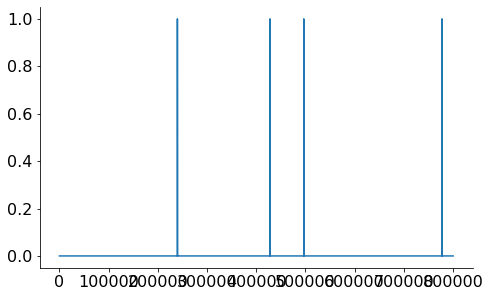

In [15]:
plt.plot(binn[:,4])

NameError: name 'sns' is not defined

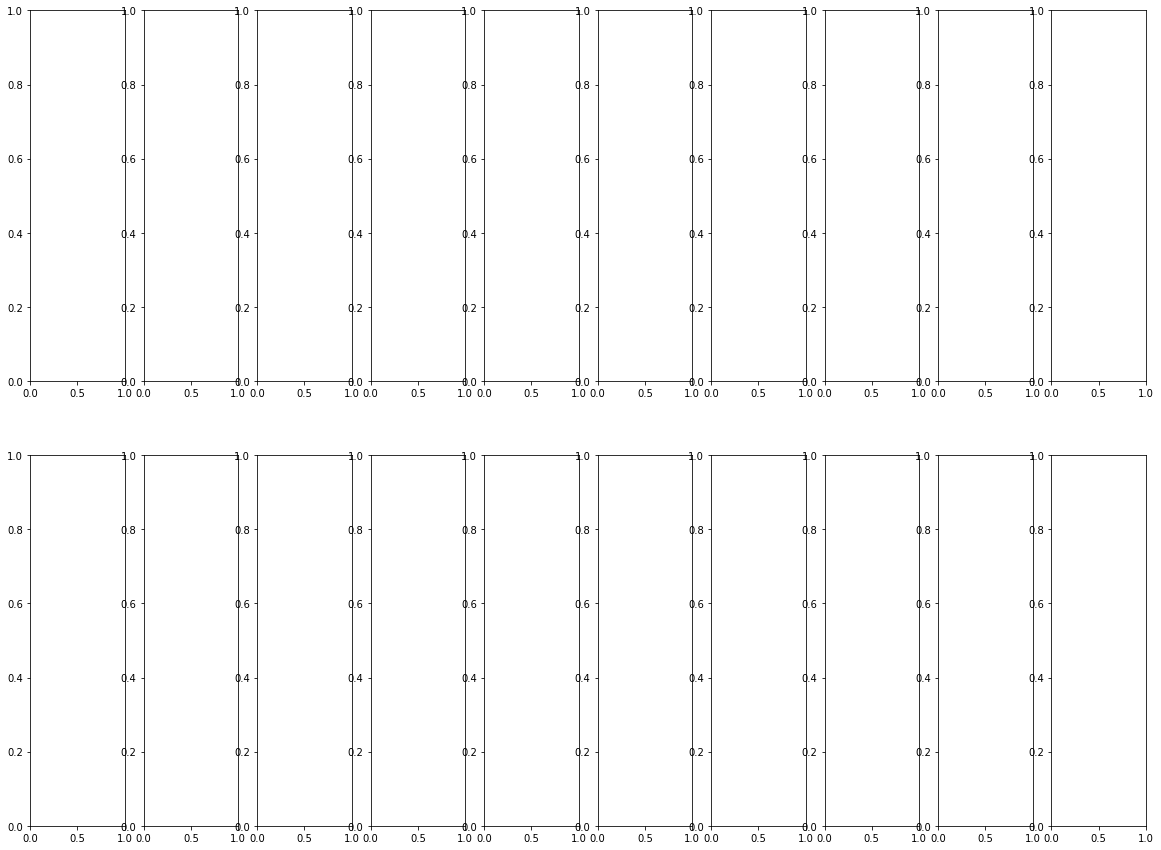

In [8]:
fig, ax = plt.subplots(2,10, figsize = (20,15))
for r in range(10):
    sns.heatmap(corr[r], square = True, ax = ax[0,r],cbar = False,vmin = -1,vmax = 1, center = 0)
    ax[0,r].set_title(f'Coupling {round(K[r],2)}')
    sns.heatmap(corr[r+10], square = True, ax = ax[1,r], cbar = False, vmin = -1, vmax = 1, center = 0) 
    ax[1,r].set_title(f'Coupling {round(K[r+10],2)}')
plt.tight_layout()

In [313]:
pda = (np.sum(mpcbin)-300)/2
S = entropy(N,pda)
p[-1], entropies[-1], couples[-1], N

(44849.0, 476.7362126649241, 44787.0, 44850.0)

NameError: name 'omega' is not defined

(0, 1)

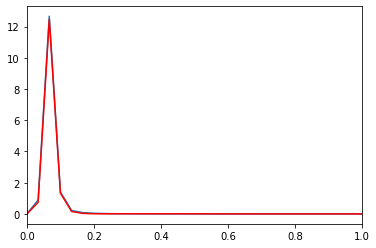

In [26]:
x,p = signal.periodogram(np.sin(thetas[:,0]), fs = 1/0.001)
plt.plot(x,p)
x,p = signal.periodogram(np.sin(thetas[:,2]), fs = 1/0.001)
plt.plot(x,p,'r')
plt.xlim(0,1)

In [17]:
activity.shape

(80000, 300)

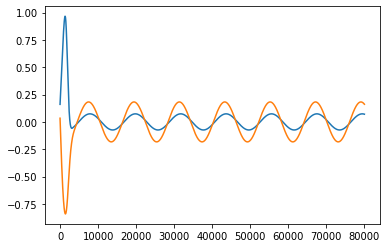

In [20]:
plt.plot(activity[:,0]-np.mean(activity,1))
plt.plot(activity[:,2]-np.mean(activity,1))

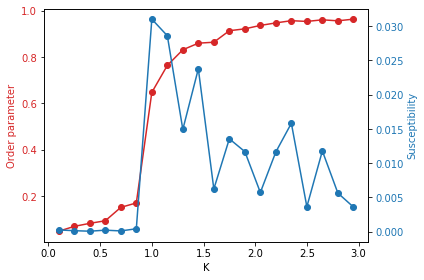

In [12]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('K')
ax1.set_ylabel('Order parameter', color=color)
ax1.plot(K, order,'-o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Susceptibility', color=color)  # we already handled the x-label with ax1
ax2.plot(K, np.array(corr),'-o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

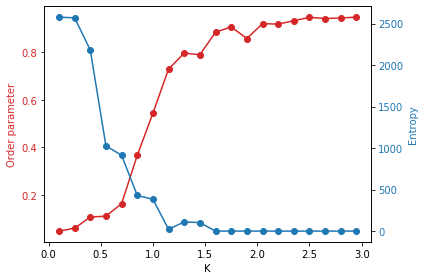

In [59]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('K')
ax1.set_ylabel('Order parameter', color=color)
ax1.plot(K, order,'-o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Entropy', color=color)  # we already handled the x-label with ax1
ax2.plot(K, np.array(entropies),'-o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [331]:
K

array([0.1 , 0.25, 0.4 , 0.55, 0.7 , 0.85, 1.  , 1.15, 1.3 , 1.45, 1.6 ,
       1.75, 1.9 , 2.05, 2.2 , 2.35, 2.5 , 2.65, 2.8 , 2.95])

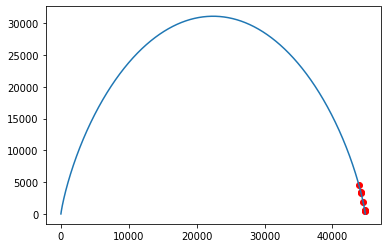

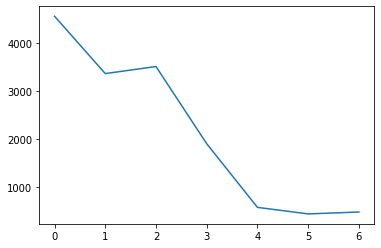

In [291]:
nc = 300
N = nc*(nc-1)/2
p = np.arange(1,nc*(nc-1)/2 )
S = entropy(N,p)
Sdata = entropy(N,pda)
plt.plot(couples,entropies, 'ro')
plt.plot(p,S)
plt.figure()
plt.plot(entropies)

In [47]:
thetas = Kuram2(50,0.001,0.1,nunits)
summ = np.sum(np.exp(1j*thetas),1)
summ = summ/nunits # Kuramoto indexes at each time
sincr = np.abs(summ)
np.mean(sincr)

0.05093171136352461

In [48]:
thetas = Kuram(50,0.001,0.1,nunits)
summ = np.sum(np.exp(1j*thetas),1)
summ = summ/nunits # Kuramoto indexes at each time
sincr = np.abs(summ)
np.mean(sincr)

0.06214405942109015

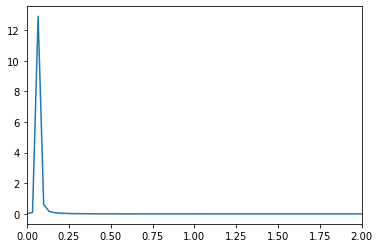

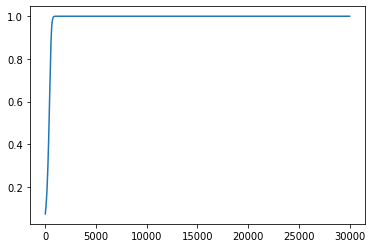

In [21]:
x,p = signal.periodogram(np.sin(thetas[:50000,0]), fs = 1/0.001)
plt.plot(x,p)
plt.xlim(0,2)
plt.figure()
plt.plot(sincr)

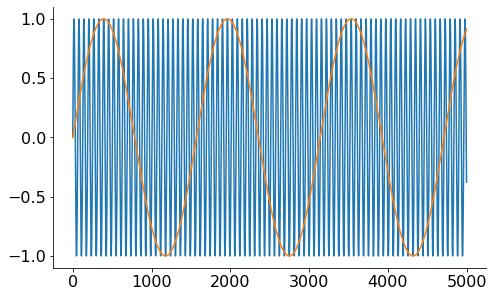

In [68]:
plt.plot(np.sin(thetas[:5000,1]))
plt.plot(np.sin(thetas[:5000,0]))